In [2]:
import pandas as pd
import numpy as np

In [20]:
data = pd.read_csv('data/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
y = data['label']
X = data.drop(['label'],axis=1)

In [53]:
y = np.array(y)
y

array([1, 0, 1, ..., 7, 6, 9])

In [57]:
y.item(10)

8

In [26]:
len(y)

42000

In [27]:
for i in range(len(y)):
    print(np.array(X.iloc[i]).reshape(28,28))
    break

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 188 255  94   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0 191 250 253  93   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  123 248 253 167  10   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  80
  247 253 208  13   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [10]:
import torch
import numpy as np

In [16]:
r = np.array(i).reshape(28,28)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [46]:
t = torch.empty(1,28,28)
for i in range(len(y)):
    t = torch.cat((t,torch.tensor(np.array(X.iloc[i]).reshape(1,28,28))),dim=0)
    break

In [48]:
tensor_list = [torch.tensor(np.array(X.iloc[i]).reshape(1, 28, 28)) for i in range(len(y))]
t = torch.cat(tensor_list, dim=0)

In [49]:
t.shape

torch.Size([42000, 28, 28])

In [4]:
test = pd.read_csv('data/test.csv')
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
import matplotlib.pyplot as plt
def save_plots(epoch_loss_dic,val_loss_dic,accuracy_dic,epoches):
    epo = list(range(1,epoches+1))
    plt.figure(figsize=(10, 5))  # Set the figure size (optional)
    plt.plot(epo,epoch_loss_dic, marker='o', linestyle='-', color='b', label='Loss per Epoch')
    plt.title('Loss vs. Epochs')  # Set the title of the graph
    plt.xlabel('Epoch')  # Label for the x-axis
    plt.ylabel('Loss')  # Label for the y-axis
    plt.grid(True)  # Enable grid for easier readability
    plt.xticks(epo)  # Set x-axis ticks to be exactly at the epochs numbers
    plt.legend()  # Show legend to identify the plot
    plt.savefig('loss_vs_epochs.png', format='png', dpi=300)

    plt.figure(figsize=(10, 5))  # Set the figure size (optional)
    plt.plot(epo,val_loss_dic, marker='o', linestyle='-', color='b', label='Loss per Epoch')
    plt.title('Loss vs. Epochs')  # Set the title of the graph
    plt.xlabel('Epoch')  # Label for the x-axis
    plt.ylabel('Loss')  # Label for the y-axis
    plt.grid(True)  # Enable grid for easier readability
    plt.xticks(epo)  # Set x-axis ticks to be exactly at the epochs numbers
    plt.legend()  # Show legend to identify the plot
    plt.savefig('val_vs_epochs.png', format='png', dpi=300)

    plt.figure(figsize=(10, 5))  # Set the figure size (optional)
    plt.plot(epo,accuracy_dic, marker='o', linestyle='-', color='b', label='Loss per Epoch')
    plt.title('Loss vs. Epochs')  # Set the title of the graph
    plt.xlabel('Epoch')  # Label for the x-axis
    plt.ylabel('Loss')  # Label for the y-axis
    plt.grid(True)  # Enable grid for easier readability
    plt.xticks(epo)  # Set x-axis ticks to be exactly at the epochs numbers
    plt.legend()  # Show legend to identify the plot
    plt.savefig('accuracy_vs_epochs.png', format='png', dpi=300)

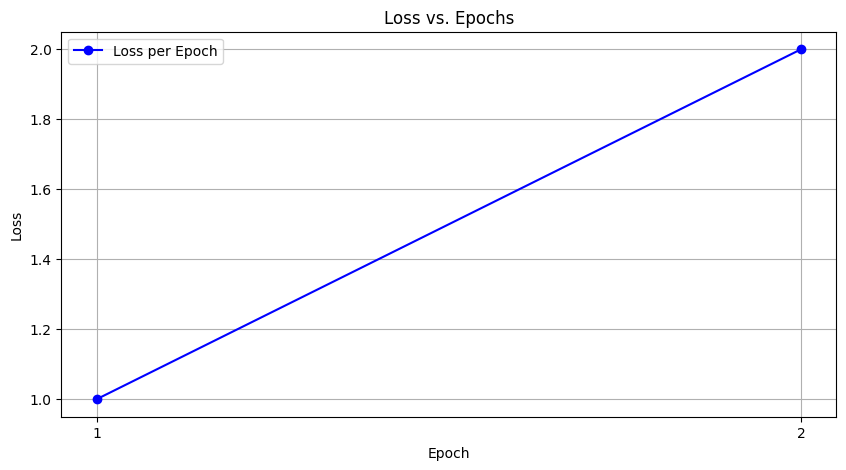

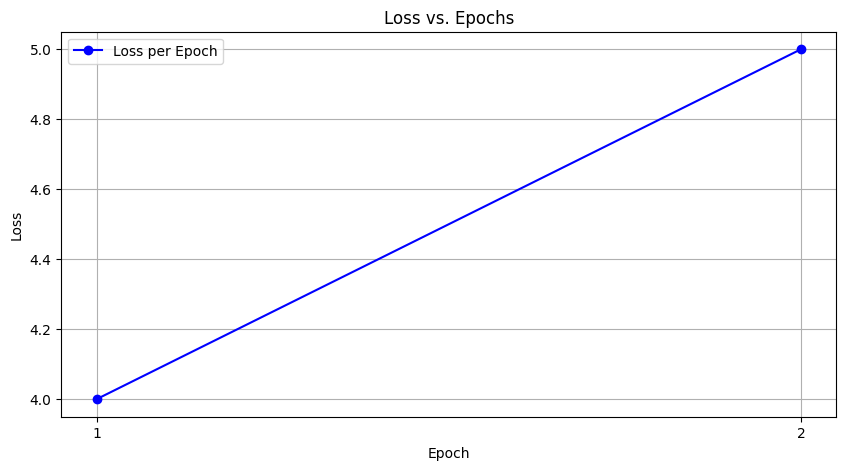

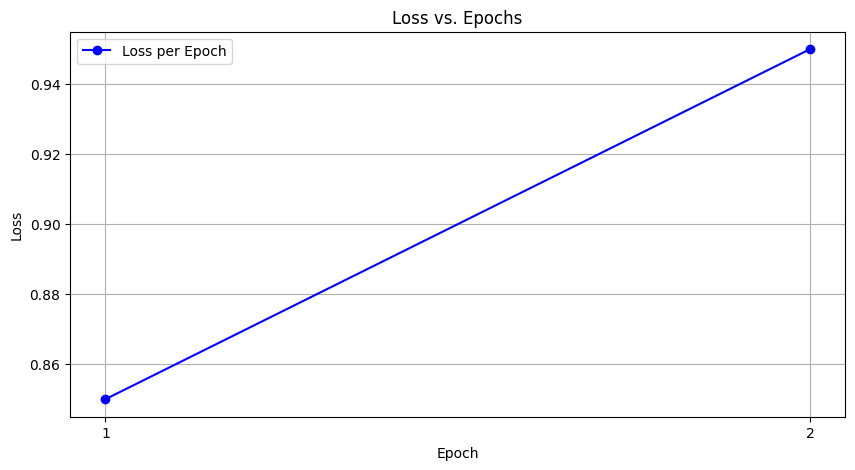

In [7]:
epoch_loss = [1,2]
epoches = 2
val_loss = [4,5]
acc = [0.85,0.95]
save_plots(epoch_loss,val_loss,acc,epoches)